In [10]:
!pip install gensim

In [11]:
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# Tải mô hình GloVe đã huấn luyện sẵn
print("Đang tải mô hình GloVe...")
model = api.load("glove-wiki-gigaword-100")  # Mô hình GloVe 100 chiều
print("Mô hình đã tải xong!")

Đang tải mô hình GloVe...
Mô hình đã tải xong!


In [13]:
# Hiển thị số từ và số chiều
model.vectors.shape

(400000, 100)

In [14]:
# Lấy danh sách từ và vector
words = list(model.key_to_index.keys())
word_vectors = np.array([model[word] for word in words])

In [15]:
# Tính toán độ tương đồng cosine
def find_similar_words(word, model, word_vectors, words, top_k=5):
    if word not in model.key_to_index:
        print(f"Từ '{word}' không có trong từ điển.")
        return
    # Tính độ tương đồng cosine
    similarities = cosine_similarity([model[word]], word_vectors)[0]
    # Lấy chỉ số của Top K từ tương đồng
    top_k_indices = similarities.argsort()[-top_k-1:-1][::-1]
    print(f" Top {top_k} từ tương đồng với '{word}':")
    for idx in top_k_indices:
        print(f"- {words[idx]}: {similarities[idx]:.4f}")

In [16]:
# Tìm kiếm với một từ cụ thể
find_similar_words("woman", model, word_vectors, words, top_k=5)

 Top 5 từ tương đồng với 'woman':
- girl: 0.8473
- man: 0.8323
- mother: 0.8276
- boy: 0.7721
- she: 0.7632


In [17]:
# Lấy danh sách từ và vector ( chỉ lấy 1000 từ , cho kq chạy nhanh hơn)
words_new = list(model.key_to_index.keys())[:1000]  # Lấy 1000 từ đầu tiên
word_vectors_new = np.array([model[word] for word in words])


In [18]:

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import random

# Giảm chiều từ 100D → 3D bằng PCA
pca = PCA(n_components=3, random_state=42)
word_vectors_3d = pca.fit_transform(word_vectors_new)



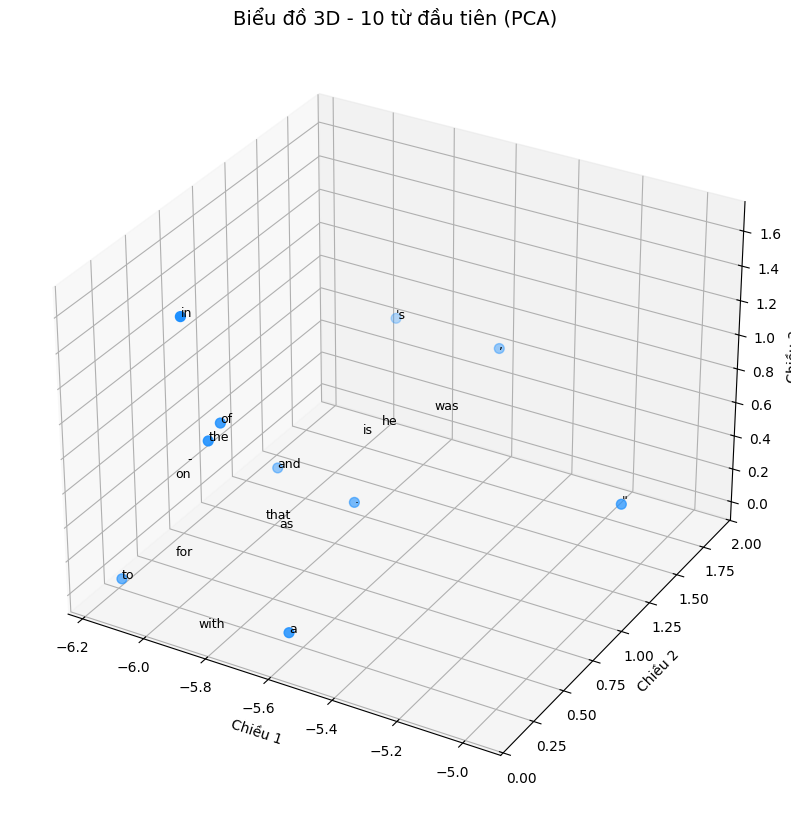

In [24]:
# Biểu đồ 1 — hiển thị 10 từ đầu tiên
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3d[:10, 0], word_vectors_3d[:10, 1], word_vectors_3d[:10, 2],
           color='dodgerblue', s=50)

# Gắn nhãn cho 20 từ đầu tiên
for i, word in enumerate(words_new[:20]):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2],
            word, fontsize=9, color='black')

ax.set_title("Biểu đồ 3D - 10 từ đầu tiên (PCA)", fontsize=14)
ax.set_xlabel("Chiều 1")
ax.set_ylabel("Chiều 2")
ax.set_zlabel("Chiều 3")
plt.show()

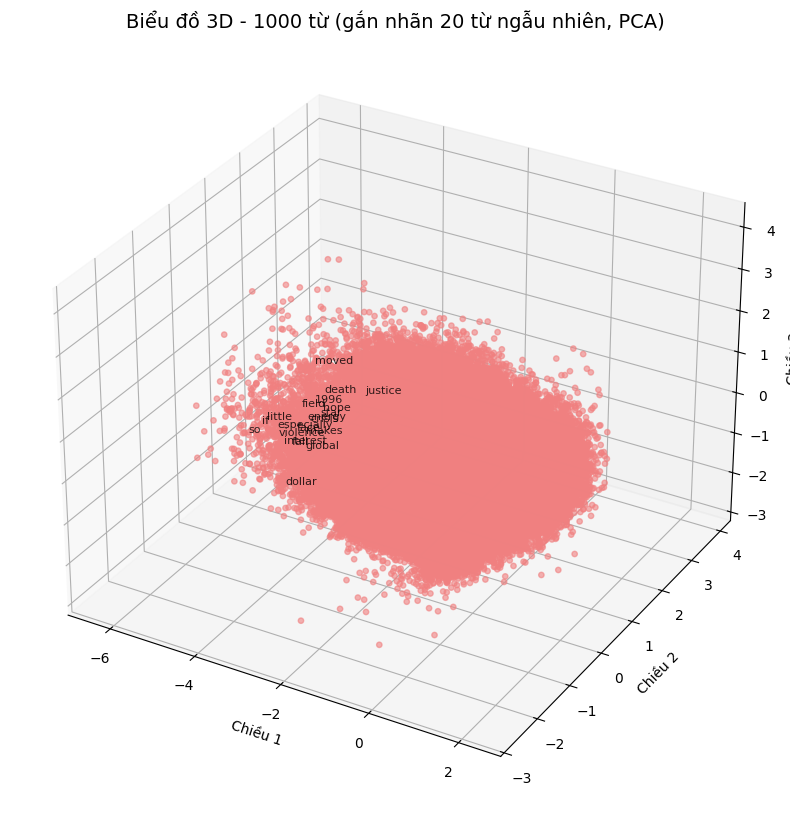

In [25]:
# Biểu đồ 2 — hiển thị toàn bộ 1000 từ (gắn nhãn 20 từ ngẫu nhiên)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2],
           color='lightcoral', s=15, alpha=0.6)

# Gắn nhãn cho 20 từ ngẫu nhiên
label_indices = random.sample(range(len(words_new)), 20)
for i in label_indices:
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2],
            words_new[i], fontsize=8, color='black', alpha=0.8)

ax.set_title("Biểu đồ 3D - 1000 từ (gắn nhãn 20 từ ngẫu nhiên, PCA)", fontsize=14)
ax.set_xlabel("Chiều 1")
ax.set_ylabel("Chiều 2")
ax.set_zlabel("Chiều 3")
plt.show()